In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import glob

In [4]:
def reader(path, first_var):
    # Open the file and read the lines
    skip=1
    with open(path, "r") as file:
        # Iterate over the lines
        for line in file:
            # Strip leading and trailing whitespace
            line = line.strip()
            # Check if the line contains column names
            if line.startswith(first_var):
                # Split the line by whitespace and append to the columns list
                columns = line[1:].strip().split("\t")
                break  # Stop reading lines after finding column names
            skip+=1
    # Read the data into a DataFrame, skipping the first 6 rows of comments
    return pd.read_csv(path, sep='\t', skiprows=skip, names=columns)

In [12]:
d = reader('./data/DASH_FLOW_240404_090206.dat', "#DOY.Frac")

In [13]:
d.keys()

Index(['DOY.Frac', 'YYYY', 'Secs', 'DO_Sh', 'DO_Smp', 'DO_Press', 'DO_Ht_T',
       'DO_Ht_Pwr', 'DO_Fl_T', 'DO_X_T', 'HO_Sh_D_Fl', 'HO_Sh', 'HO_Smp',
       'HO_Press', 'HO_RH', 'HO_T', 'HO_Ht_T', 'HO_Ht_Pwr', 'HO_Fl_T',
       'HO_X_T', 'HO_DP_Cl', 'HO_DP_Lk', 'HM_Sh_D_Fl', 'HM_Sh', 'HM_Xs',
       'HM_Smp_Xs', 'HM_Press', 'HM_RH', 'HM_T', 'HM_Ht_T', 'HM_Ht_Pwr',
       'HM_Fl_T', 'HM_X_T', 'HM_DP_Cl', 'HM_DP_Lk', 'H2O_T', 'H2O_Pwr',
       'H2O_Lvl', 'H2O_Cnt'],
      dtype='object')

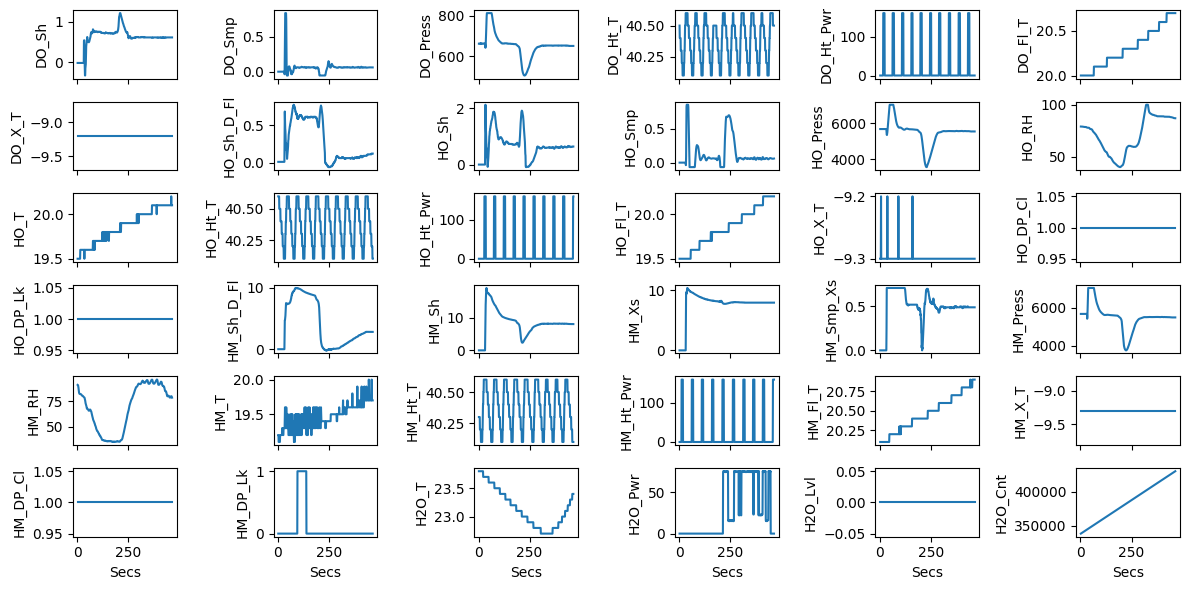

In [14]:
fig,axes = plt.subplots(6,6, sharex=True, figsize=(12, 6))
ks = d.keys()
for i,ax in enumerate(axes.ravel()):
    k = ks[i+3]
    ax.plot(d['Secs'], d[k])
    ax.set_ylabel(k)
    if i>29:
        ax.set_xlabel('Secs')
fig.tight_layout()
plt.savefig('./figures/all.png', dpi=300)

In [15]:
d = reader('./data/OPC_212_231217_105844.txt', "#YY/MM/DD")

In [18]:
for i in range(0,len(d)):
    num = []
    for i, k in enumerate(d.keys()):
        if 'bin' in k:
            print(i)
            num.append(d.iloc[100][k])
    break
    plt.plot(num)

15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86


In [46]:
len(d)

15769

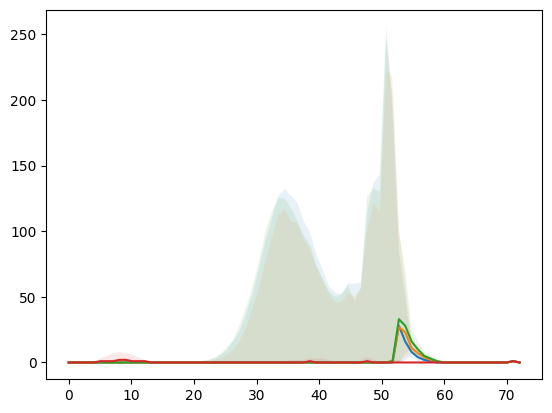

In [65]:
bd = d.groupby(d.index // 5000).median(numeric_only=True)
bd_25 = d.groupby(d.index // 5000).quantile(.25, numeric_only=True)
bd_75 = d.groupby(d.index // 5000).quantile(.75, numeric_only=True)
for i in range(0,len(bd)):
    x = np.linspace(0,72,72)
    y = bd.iloc[i,15:87]
    plt.plot(x, y)
    plt.fill_between(x, bd_25.iloc[i,15:87], bd_75.iloc[i,15:87], alpha=.1)

In [5]:
paths = sorted(glob.glob('./data/DASH_FLOW*'))
all_d = []
for i in range(0, len(paths)):
    all_d.append(reader(paths[i], "#DOY.Frac"))
all_d = pd.concat(all_d).reset_index()
keys = ['UpSt_Sh', 'UpSt_Xs', 'UpSt_Samp', 'UpSt_FAdj', 'UpSt_Rh', 'UpSt_T', 'UpSt_Press', 'UpSt_Dia', 'UpSt_HV']


In [6]:
d = all_d

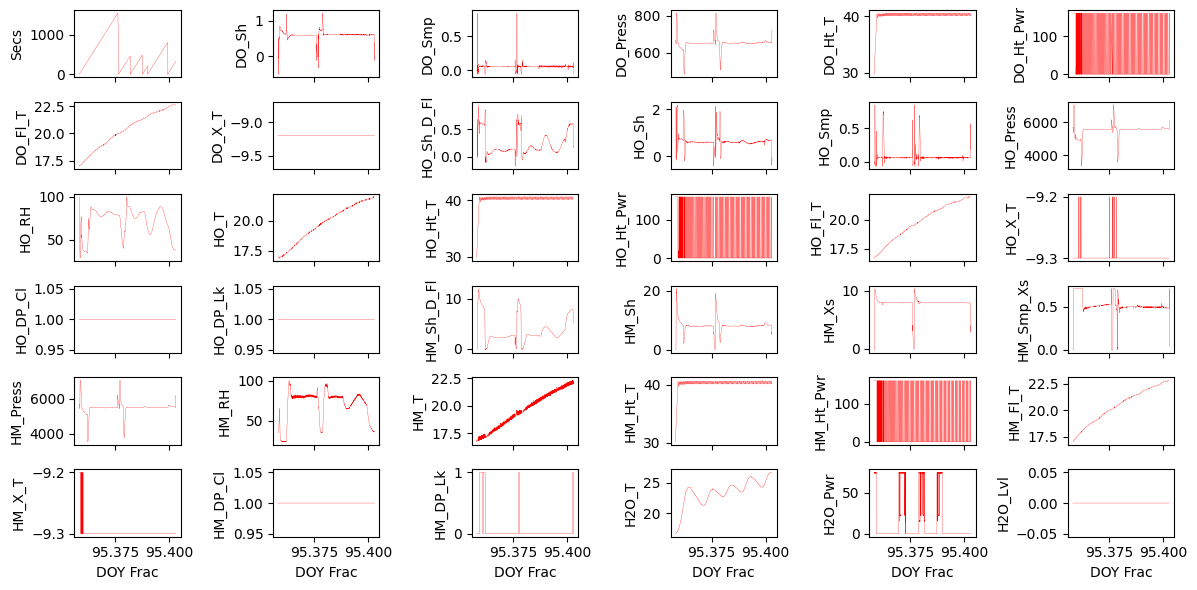

In [12]:
fig,axes = plt.subplots(6,6, sharex=True, figsize=(12, 6))
ks = d.keys()
for i,ax in enumerate(axes.ravel()):
    k = ks[i+3]
    ax.plot(d['DOY.Frac'], d[k], lw=.2, c='r')
    ax.set_ylabel(k)
    if i>29:
        ax.set_xlabel('DOY Frac')
fig.tight_layout()
plt.savefig('./figures/all.png', dpi=300)